# Qualitatitive topic evaluations
This notebook is used for formatting the data for qualitative evaluations. This includes: 
- Inspecting the topic words
- Inspecting representative documents
- Coming up with good "titles" for the topics

In [11]:
import pickle
import numpy as np
import pandas as pd
import re
from bertopic import BERTopic
from pathlib import Path

In [16]:
def read_pickle(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(f)

def get_model_name(model_path: Path) -> str:
    return re.match("\w+-\w+-\d+", model_path.name).group()
    

In [18]:
DATA_DIR = Path("../data")
MODEL_DIR = Path("../models")

models = list(MODEL_DIR.glob("*topic_model*"))
model_path = models[0]
model_name = get_model_name(model_path)
doc_topics = pd.read_csv(DATA_DIR / f"{model_name}_doc_topics.csv")

<AxesSubplot:ylabel='Frequency'>

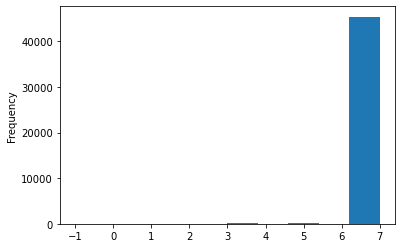

In [23]:
doc_topics["topic"].plot.hist()

In [39]:
for topic_key in topic_dict.keys():
    doc_subset = doc_topics.loc[doc_topics["topic"] == topic_key]
    example_docs = doc_subset["doc"].sample(5, weights=doc_subset["prob"])
    print(f"Results for topic nr. {topic_key}:")
    print(f"word list: {topic_dict[topic_key]}")
    print("representative documents:")
    for doc in example_docs.tolist():
        print(doc)
    print("\n")

Results for topic nr. 0:
word list: ['skatterådet', 'spørger', 'bekræfte', 'stk', 'bekræfter', 'spørgers', 'anses', 'danmark', 'nr', 'jf', 'momslovens', 'omfattet', 'salg', 'virksomhed', 'moms', 'fast', 'bekræftede', 'selskab', '13', 'forbindelse', 'ejendom', 'tale', 'endvidere', 'danske', 'dansk', 'ligningslovens', 'selskabsskattelovens', 'skat', 'del', 'finder']
representative documents:
Et påtænkt selskab blev anset for et investeringsselskab efter aktieavancebeskatningslovens § 19, stk. 2, nr. 2.
Spørgeren påtænker, at indgå en serviceaftale om drift, rengøring og pleje af en nyopført bygnings facader. Spørger vil ikke selv udføre opgaverne, men udlicitere dem til en anden virksomhed.
Skatterådet bekræfter, at der skal betales afgift af lystfartøjsforsikring, når en dansk ejer af en lystbåd under nærmere beskrevne vilkår overdrager en andel af båden til et selskab (A) i EU-land X. A foretager en registrering af båden i det pågældende land, og tegner forsikring af båden. Skatterådet

### Something's rotten in the state of topic 1
It seems to be empty

In [32]:
topic1 = doc_topics[doc_topics["topic"] == 1]
topic1["doc"] = topic1["doc"].str.strip().replace("", np.nan)


C:\Users\jhr\AppData\Local\Temp/ipykernel_12376/2005448945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic1["doc"] = topic1["doc"].str.strip().replace("", np.nan)


,topic,prob,doc
